### Import the libraries first

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, AveragePooling2D, BatchNormalization, concatenate
from keras.layers import Dense, Flatten, ReLU
from keras.models import Model
from sklearn.model_selection import train_test_split

In [2]:
train_path = 'data/train/'
test_path  = 'data/test/'

### Processing training data

In [3]:
train_images = []       
train_labels = []
shape = (200,200)  

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
X_train,X_val,y_train,y_val = train_test_split(train_images,train_labels, test_size=0.1)

### Processing testing data

In [4]:
test_images = []
test_labels = []
shape = (200,200)

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
X_test = np.array(test_images)
y_test = pd.get_dummies(test_labels).values

[1 0 0 0]


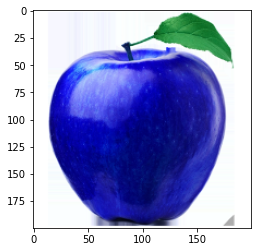

In [5]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

### Create the Model

In [6]:
_input = Input((200,200,3,)) 

C1 = Conv2D(filters=64, kernel_size=(3,3), padding="same")(_input)
B1 = BatchNormalization()(C1)
R1 = ReLU()(B1)
C2 = Conv2D(filters=64, kernel_size=(5,5), strides=2)(B1)
B2 = BatchNormalization()(C2)
R2 = ReLU()(B2)

C3 = Conv2D(filters=64, kernel_size=(3,3), padding="same")(B2)
B3 = BatchNormalization()(C3)
R3 = ReLU()(B3)
C4 = Conv2D(filters=64, kernel_size=(5,5), padding="same")(B2)
B4 = BatchNormalization()(C4)
R4 = ReLU()(B4)
C5 = Conv2D(filters=64, kernel_size=(7,7), padding="same")(B2)
B5 = BatchNormalization()(C5)
R5 = ReLU()(B5)
C6 = Conv2D(filters=64, kernel_size=(11,11), padding="same")(B2)
B6 = BatchNormalization()(C6)
R6 = ReLU()(B6)

CN1 = concatenate([B2, B3, B4, B5, B6], axis=1)
B1x = BatchNormalization()(CN1)

C7 = Conv2D(filters=128, kernel_size=(3,3), strides=2)(B1x)
B7 = BatchNormalization()(C7)
R7 = ReLU()(B7)
C8 = Conv2D(filters=128, kernel_size=(3,3), strides=2)(B1x)
B8 = BatchNormalization()(C8)
R8 = ReLU()(B8)
C9 = Conv2D(filters=128, kernel_size=(3,3), strides=2)(B1x)
B9 = BatchNormalization()(C9)
R9 = ReLU()(B9)
C10 = Conv2D(filters=128, kernel_size=(3,3), strides=2)(B1x)
B10 = BatchNormalization()(C10)
R10 = ReLU()(B10)

CN2 = concatenate([B7, B8, B9, B10], axis=1)
B2x = BatchNormalization()(CN2)

#C11 = Conv2D(filters=32, kernel_size=(3,3), padding="same")(B2x)
#B11 = BatchNormalization()(C11)
#R11 = ReLU()(B11)
#C12 = Conv2D(filters=32, kernel_size=(5,5), padding="same")(B2x)
#B12 = BatchNormalization()(C12)
#R12 = ReLU()(B12)
#C13 = Conv2D(filters=32, kernel_size=(7,7), padding="same")(B2x)
#B13 = BatchNormalization()(C13)
#R13 = ReLU()(B13)
#C14 = Conv2D(filters=32, kernel_size=(11,11), padding="same")(B2x)
#B14 = BatchNormalization()(C14)
#R14 = ReLU()(B14)

#CN3 = concatenate([B2x, B11, B12, B13, B14], axis=1)
#B3x = BatchNormalization()(CN3)

#C15 = Conv2D(filters=32, kernel_size=(7,7), strides=2)(B3x)
#B15 = BatchNormalization()(C15)
#R15 = ReLU()(B15)
#C16 = Conv2D(filters=32, kernel_size=(7,7), strides=2)(B3x)
#B16 = BatchNormalization()(C16)
#R16 = ReLU()(B16)
#C17 = Conv2D(filters=32, kernel_size=(7,7), strides=2)(B3x)
#B17 = BatchNormalization()(C17)
#R17 = ReLU()(B17)
#C18 = Conv2D(filters=32, kernel_size=(7,7), strides=2)(B3x)
#B18 = BatchNormalization()(C18)
#R18 = ReLU()(B18)
#C19 = Conv2D(filters=32, kernel_size=(7,7), strides=2)(B3x)
#B19 = BatchNormalization()(C19)
#R19 = ReLU()(B19)

#CN4 = concatenate([B15, B16, B17, B18, B19], axis=1)
#B4x = BatchNormalization()(CN4)

A1 = AveragePooling2D((7,7), strides=2)(B2x)
F1 = Flatten()(A1)
D1 = Dense(64)(F1)

F2 = Flatten()(D1)
D2 = Dense(32)(F2)

F3 = Flatten()(D2)
O = Dense(4, activation="softmax")(F3)


my_model  = Model(inputs=_input, outputs=O)
my_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 200, 200, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 200, 200, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 98, 98, 64)   102464      batch_normalization[0][0]        
_______________________________________________________________________________________

In [7]:
my_model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [8]:
history = my_model.fit(X_train,y_train,epochs=15,batch_size=16,validation_data=(X_val,y_val))

Epoch 1/15
14/14 [==============================] - 307s 22s/step - loss: 602.4556 - accuracy: 0.5556 - val_loss: 25712.8809 - val_accuracy: 0.5000
Epoch 2/15
14/14 [==============================] - 317s 23s/step - loss: 478.1801 - accuracy: 0.7361 - val_loss: 29398.9277 - val_accuracy: 0.2500
Epoch 3/15
14/14 [==============================] - 307s 22s/step - loss: 311.2929 - accuracy: 0.7731 - val_loss: 6221.5356 - val_accuracy: 0.7083
Epoch 4/15
14/14 [==============================] - 331s 24s/step - loss: 271.2936 - accuracy: 0.8056 - val_loss: 2210.3420 - val_accuracy: 0.7083
Epoch 5/15
14/14 [==============================] - 302s 22s/step - loss: 137.2003 - accuracy: 0.8472 - val_loss: 2017.0536 - val_accuracy: 0.6667
Epoch 6/15
14/14 [==============================] - 318s 23s/step - loss: 208.9183 - accuracy: 0.8056 - val_loss: 4009.8184 - val_accuracy: 0.4167
Epoch 7/15
14/14 [==============================] - 327s 23s/step - loss: 120.5008 - accuracy: 0.8472 - val_loss: 14

### Visualize the accuracy vs number of epochs

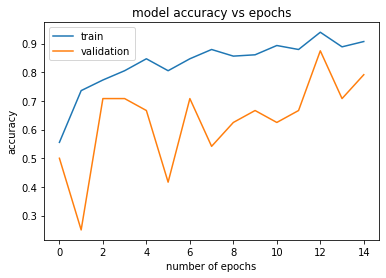

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy vs epochs')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
# load the weights that yielded the best validation accuracy
my_model.save('cnn_from_scratch_fruits.hdf5')

In [11]:
#my_model.load_weights('cnn_from_scratch_fruits.hdf5')

In [13]:
ModelLoss, ModelAccuracy = my_model.evaluate(X_test,y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

2/2 [==============================] - 7s 3s/step - loss: 273.6110 - accuracy: 0.8000
Test Loss is 273.6109924316406
Test Accuracy is 0.800000011920929
